## Train data

In [26]:
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

train_df = pd.read_csv('./data/train_all_1.csv')
train_df.head()

,text,label
0,tư vấn giúp mình với,greetings
1,hi,greetings
2,hi ad,greetings
3,chào buổi sáng,greetings
4,hello,greetings


In [31]:
train_df_fil = train_df[:764]
train_df_fil.to_csv('./data/train_intent_old.csv', index = False)

In [18]:
train_df

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc
...,...,...
405,taikhoan_khoa,công ty này thật tệ bạn có thể chấm dứt tài kh...
406,outofscoreother,tôi bị lạc đường
407,outofscoreother,tôi bị điểm kém
408,outofscorenonvietnamese,jai perdu


In [19]:
bieu_phi_test = ["Cho tôi xin biểu phí", "biểu phí"]

In [4]:
submenu_phi_text = ['Giá thế nào', "Biểu phí như nào", "Thẻ này làm hết bao nhiêu", "Phí làm thẻ", "Tôi xin phí cấp thẻ", "Cấp thẻ mất phí nhiêu nhỉ", "biểu phí sử dụng thẻ đắt không", "biểu phí sử dụng thẻ như thế nào nhỉ", "giá như nào", "phí như nào", "Chuyển tiền ngoài ngân hàng VIB có mất phí không?", "sử dụng ứng dụng ngân hàng di động vib có mất phí không"]

In [10]:
nghiep_vu_uu_dai = ["Hiện tại có chương trình khuyến mại nào không", "Bên mình có khuyến mại gì không", "Bây giờ có ưu đãi gì không", "khuyến mãi khi mở thẻ", "chương trình khuyến mãi là gì ", "khuyến mãi", "dịch vụ khuyến mãi", "dạo này có chương trình khuyến mãi nào cho khách hàng mở thẻ mới không"]

In [13]:
dang_ky_the = ["Tôi muốn mở thẻ", "Đăng ký thẻ", "Mở thẻ", "tôi muốn làm thẻ", "Tôi cần mở thẻ", "t muốn làm thẻ", "muốn làm thẻ VIB ", "mở thẻ thủ tục ra sao", "mở thẻ thủ tục ra sao nhỉ", "thủ tục mở thẻ ra sao?", "Mở thẻ tín dụng thế nào ạ?", "mở thẻ visa", "Em muốn đăng ký thẻ credit card", "Em muốn làm thẻ credit card ạ", "Em muốn làm thẻ ATM ạ", "Tôi có thể mở thẻ master online được ko?", "Hướng dẫn tôi mở thẻ", "mình muốn tạo một cái thẻ atm thì làm sao nhỉ", "mình muốn đăng ký làm thẻ atm bạn hướng dẫn mình nhé"]

In [24]:
good_bye = ["tôi có việc mất rồi", "tôi đang có việc rồi hẹn gặp lại", "thế nhé tôi đi đây", "hẹn sau gặp lại", "tôi có việc phải đi rồi"]

In [25]:
new_row = pd.DataFrame({'text': good_bye, 'label':['goodbye']*len(good_bye)})
new_row

,text,label
0,tôi có việc mất rồi,goodbye
1,tôi đang có việc rồi hẹn gặp lại,goodbye
2,thế nhé tôi đi đây,goodbye
3,hẹn sau gặp lại,goodbye
4,tôi có việc phải đi rồi,goodbye


In [22]:
train_df = pd.concat([train_df, new_row], ignore_index = True)
train_df

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc
...,...,...
407,outofscoreother,tôi bị điểm kém
408,outofscorenonvietnamese,jai perdu
409,outofscorenonvietnamese,私は負けた
410,submenubieuphi,Cho tôi xin biểu phí


In [23]:
train_df.to_csv('test_all_1.csv', index = False)

In [99]:
import translators as ts

Using region  server backend.


In [100]:
ts.preaccelerate()

Preacceleration Process: 100%|██████████████████| 26/26 [01:57<00:00,  4.50s/it]


{'success': ['alibaba',
  'argos',
  'baidu',
  'bing',
  'caiyun',
  'google',
  'iciba',
  'iflyrec',
  'itranslate',
  'lingvanex',
  'mglip',
  'modernMt',
  'myMemory',
  'papago',
  'qqFanyi',
  'qqTranSmart',
  'reverso',
  'sogou',
  'translateCom',
  'youdao'],
 'fail': ['deepl', 'iflytek', 'niutrans', 'utibet', 'volcEngine', 'yandex']}

In [109]:
idx = 1
tx = df[df['label'] == 'lost_or_stolen_card']['text'].iloc[idx]
tx

'I lost my wallet and all my cards were in it.'

In [110]:
ts.translate_text(tx, translator='google', from_language='en', to_language='vi')

'Tôi bị mất ví và tất cả các thẻ của tôi đều ở trong đó.'

In [5]:
# train_df_en[10:50]

In [114]:
import time 
def trans(text):
    try:
        return ts.translate_text(text, translator='google', from_language='en', to_language='vi', if_use_preacceleration=True, sleep_seconds = 0.5)
    except:
        return ''
    return ''

In [115]:
trans(tx)

'Tôi bị mất ví và tất cả các thẻ của tôi đều ở trong đó.'

In [52]:
test_en = train_df['message_clean'].map(trans) 

In [54]:
train_df_en = pd.DataFrame({'message_clean': test_en, 'label': train_df['label']})
train_df_en

,message_clean,label
0,"Hi, let me ask you",greetings
1,Hello I mean,greetings
2,my name is Thao,greetings
3,Can you help me,greetings
4,I need to ask some things,greetings
...,...,...
222,You answer so badly,submenucomplain
223,really bad,submenucomplain
224,Too worse,submenucomplain
225,Staff attitude is unprofessional,submenucomplain


In [55]:
train_df_en = train_df_en[train_df_en['message_clean'] != ''].reset_index(drop=True)

In [59]:
len(train_df_en)

205

In [58]:
train_df_en = train_df_en.drop_duplicates(subset=['message_clean']).reset_index(drop=True)

In [61]:
train_df_en[train_df_en['label']=='greetings']

,message_clean,label
0,"Hi, let me ask you",greetings
1,Hello I mean,greetings
2,my name is Thao,greetings
3,Can you help me,greetings
4,I need to ask some things,greetings
5,"Hello, can you help me with some things?",greetings
6,Please let me ask,greetings
7,"Hello, can you help me",greetings
8,I asked a little,greetings
9,I asked,greetings


In [62]:
sum_df = pd.concat([train_df, train_df_en], ignore_index=True)
sum_df.head()

,label,message,predict_label,message_clean
0,greetings,chào bạn cho mình hỏi chút với ạ,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là Nghĩa,greetings,xin chào mình là nghĩa
2,greetings,tên t là Thảo,greetings,tên tôi là thảo
3,greetings,b có thể giúp tôi được không,outofscoreother,bạn có thể giúp tôi được không
4,greetings,t cần hỏi một số việc,mainmenu,tôi cần hỏi một số việc


In [63]:
sum_df

,label,message,predict_label,message_clean
0,greetings,chào bạn cho mình hỏi chút với ạ,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là Nghĩa,greetings,xin chào mình là nghĩa
2,greetings,tên t là Thảo,greetings,tên tôi là thảo
3,greetings,b có thể giúp tôi được không,outofscoreother,bạn có thể giúp tôi được không
4,greetings,t cần hỏi một số việc,mainmenu,tôi cần hỏi một số việc
...,...,...,...,...
427,submenucomplain,NaN,NaN,You answer so badly
428,submenucomplain,NaN,NaN,really bad
429,submenucomplain,NaN,NaN,Too worse
430,submenucomplain,NaN,NaN,Staff attitude is unprofessional


In [64]:
sum_df.to_csv('./data/test_multi.csv', index = False)

## Test data

In [1]:
import yaml

In [40]:
import matplotlib.pyplot as plt

In [4]:
with open('./data/nlu.yml') as file:
    docs = yaml.load(file, Loader=yaml.FullLoader)
    
# print(docs)

In [12]:
intents = [d['intent'] for d in docs['nlu']]
intents

['greetings',
 'goodbye',
 'thanks',
 'affirm',
 'deny',
 'moodgreat',
 'mainmenu',
 'submenuthongtin',
 'submenuthongtinID',
 'submenuthongtinemailphone',
 'submenubieuphi',
 'submenucomplain',
 'submenulienhetuvan',
 'branchlocation',
 'cardproductmainmenu',
 'cardproductdangkythe',
 'cardproductkhuyenmai',
 'cardproductkiemtrahoso',
 'cardproductkiemtragiaonhan',
 'outofscorenonvietnamese',
 'outofscoreother']

In [201]:
len(intents)

21

In [537]:
intents.index('submenucomplain')

11

In [39]:
total_data_train = [ len(d['examples'].split('\n')) for d in docs['nlu'] ]

In [446]:
import numpy as np
np.array(total_data_train).sum()

881

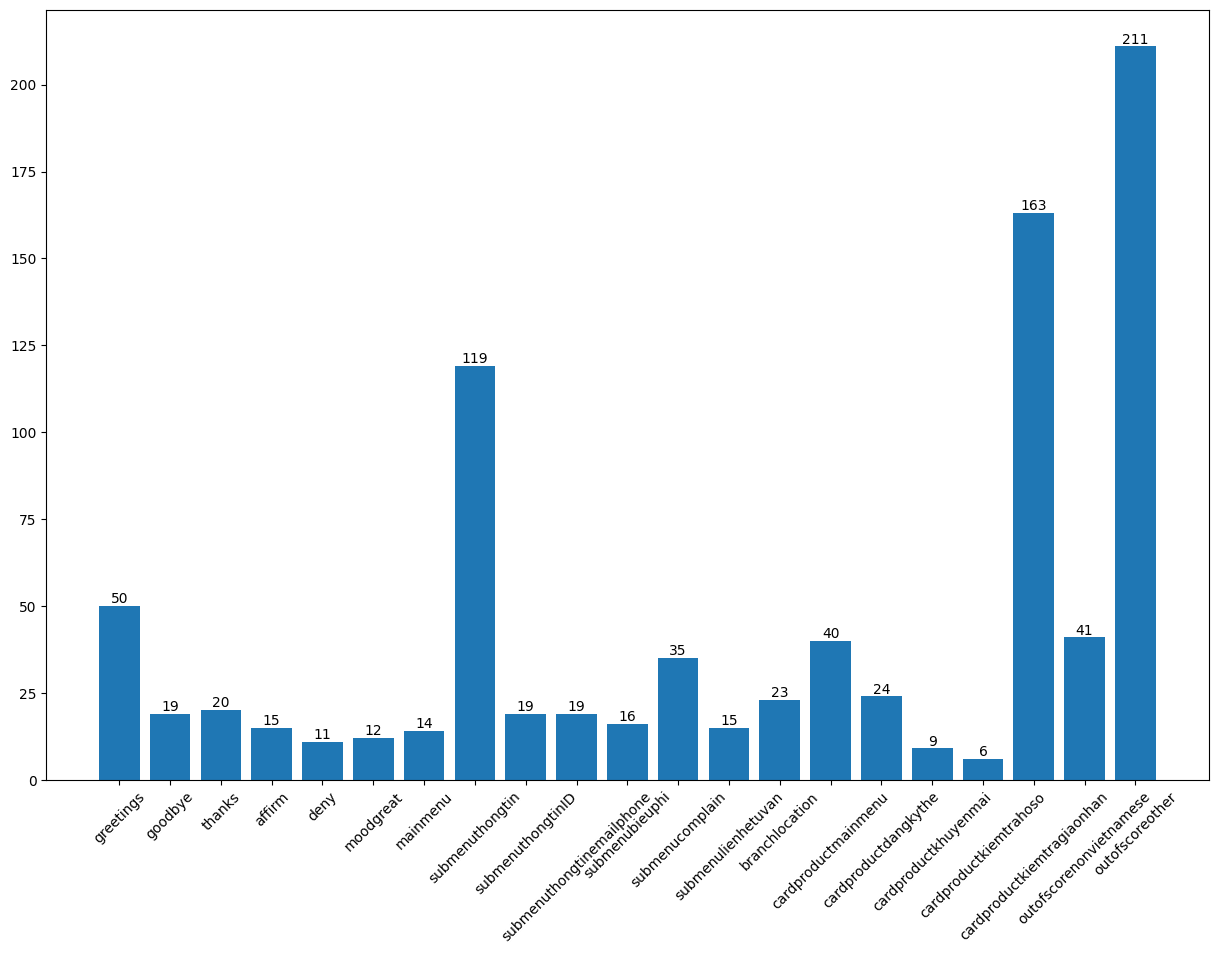

In [59]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.bar(intents, total_data_train)

for i, v in enumerate(total_data_train):
    plt.text(i, v, str(v), ha='center', va='bottom')

In [544]:
idx = 11
print(docs['nlu'][idx]['intent'])
print(len(docs['nlu'][idx]['examples'].split('\n')))
docs['nlu'][idx]['examples'].split('\n')[:20]

submenucomplain
35


['- Ngân hàng làm ăn chán thế',
 '- Chăm sóc khách hàng tệ quá',
 '- Tôi thấy chưa ok đâu',
 '- Cảm giác không ổn lắm',
 '- Có ai giải quyết ok không',
 '- Tôi muốn khiếu nại',
 '- Dịch vụ bên mình chưa được',
 '- Trải nghiệm không tốt',
 '- Tôi chưa hài lòng cách phục vụ của ngân hàng',
 '- Tôi thấy có một số vấn đề',
 '- App chán thế',
 '- Tệ thật',
 '- app tệ thế',
 '- tại sao tài khoản tôi bị trừ tiền vô lý',
 '- tôi bị trừ tiền ở tài khoản',
 '- tài khoản của mình bị mất tiền vô lý',
 '- t bị mất tiền trong tài khoản',
 '- dịch vụ bên bạn quá tệ',
 '- dịch vụ tệ quá đi',
 '- tư vấn quá chán']

In [545]:
strip_list = [doc.strip('- ') for doc in docs['nlu'][idx]['examples'].split('\n')]
strip_list

['Ngân hàng làm ăn chán thế',
 'Chăm sóc khách hàng tệ quá',
 'Tôi thấy chưa ok đâu',
 'Cảm giác không ổn lắm',
 'Có ai giải quyết ok không',
 'Tôi muốn khiếu nại',
 'Dịch vụ bên mình chưa được',
 'Trải nghiệm không tốt',
 'Tôi chưa hài lòng cách phục vụ của ngân hàng',
 'Tôi thấy có một số vấn đề',
 'App chán thế',
 'Tệ thật',
 'app tệ thế',
 'tại sao tài khoản tôi bị trừ tiền vô lý',
 'tôi bị trừ tiền ở tài khoản',
 'tài khoản của mình bị mất tiền vô lý',
 't bị mất tiền trong tài khoản',
 'dịch vụ bên bạn quá tệ',
 'dịch vụ tệ quá đi',
 'tư vấn quá chán',
 'làm ăn bát nháo',
 'làm ăn vớ vẩn',
 'khó chịu',
 'vớ vẩn',
 'dịch vụ gì mà đắt quá',
 'dịch vụ gì đắt thế',
 'chờ hơi lâu rồi đấy',
 'mình chưa nhận được tư vấn',
 'tư vấn viên trả lời trễ quá ạ',
 'mình ko hài lòng thái độ nhân viên',
 'mình không hài lòng sản phẩm vib',
 'đơn giản thế không biết',
 'bot ngu',
 'điên',
 '']

In [546]:
new_list = []

In [556]:
text = 'thái độ của nhân viên quá tệ'
if text not in strip_list:
    new_list.append(text)
    strip_list.append(text)
    print(len(new_list))

10


In [559]:
import json
with open('./data/test.json', 'w', encoding="utf-8") as f:
    json.dump(test_dict, f, ensure_ascii=False)

In [521]:
import json
with open('./data/test.json', 'r', encoding="utf-8") as f:
    t = json.load(f)  # parse the contents using json.loads()

In [523]:
# t

In [558]:
test_dict

{'greetings': ['chào bạn cho mình hỏi chút với ạ',
  'xin chào mình là Nghĩa',
  'tên t là Thảo',
  'b có thể giúp tôi được không',
  't cần hỏi một số việc',
  'xin chào bạn có thể giúp tôi một số việc được không',
  'B cho mình hỏi với',
  'bạn cho mình hỏi với',
  'xin chào b có thể giúp t được không',
  'mình hỏi chút',
  't hỏi với',
  'xin chào nice to meet you',
  'nice to meet you',
  'Hello b',
  'Hello bạn',
  'Hi bạn',
  'trò chuyện nhé',
  'dở tệ'],
 'goodbye': ['oke bai bai nhé',
  'mình có việc rồi',
  'tạm biệt nhé',
  'hẹn gặp lại',
  'gặp lại sau nhé',
  'bai',
  'oke gút bai',
  'tạm biệt nhé t có việc phải đi rồi',
  'oke hẹn gặp lại bot',
  'thôi thế nhé',
  't có việc mất rồi hẹn gặp lại c',
  'bye'],
 'thanks': ['oke mình cảm ơn nhé',
  'oke t cảm ơn nhé',
  'oke thanks',
  'thank kiu',
  'thank kiu bạn nha',
  'mình cảm ơn nha',
  't cảm ơn nha',
  't cảm ơn nhé',
  'oke cảm ơn b',
  'okay t cảm ơn',
  'cảm ơn',
  'cảm ơn nha'],
 'affirm': ['ừ đúng rồi',
  'oke',

In [557]:
test_dict['submenucomplain'] = new_list

## Reading file 

In [118]:
from tqdm import tqdm

In [120]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [122]:
df['label'].progress_apply(lambda x: x+'hello')

  0%|          | 0/10003 [00:00<?, ?it/s]

0           card_arrivalhello
1           card_arrivalhello
2           card_arrivalhello
3           card_arrivalhello
4           card_arrivalhello
                 ...         
9998     country_supporthello
9999     country_supporthello
10000    country_supporthello
10001    country_supporthello
10002    country_supporthello
Name: label, Length: 10003, dtype: object

In [260]:
import pandas as pd

df = pd.read_csv('./data/train_v2.csv')
df.head()

,Unnamed: 0,text,label,text_clean
0,0,tư vấn giúp mình với,greetings,tư vấn giúp mình với
1,1,hi,greetings,hi
2,2,hi ad,greetings,hi ad
3,3,chào buổi sáng,greetings,chào buổi sáng
4,4,hello,greetings,hello


In [161]:
df_en = df.iloc[227:]

In [162]:
df = df.iloc[:227]

In [163]:
df_en

,label,message,predict_label,message_clean
227,greetings,NaN,NaN,"Hi, let me ask you"
228,greetings,NaN,NaN,Hello I mean
229,greetings,NaN,NaN,my name is Thao
230,greetings,NaN,NaN,Can you help me
231,greetings,NaN,NaN,I need to ask some things
...,...,...,...,...
427,submenucomplain,NaN,NaN,You answer so badly
428,submenucomplain,NaN,NaN,really bad
429,submenucomplain,NaN,NaN,Too worse
430,submenucomplain,NaN,NaN,Staff attitude is unprofessional


In [264]:
idx = 14
df['label'].unique()[idx]

'cardproductmainmenu'

In [265]:
l = df['label'].unique()[idx]

In [266]:
df[df['label'] == l]

,Unnamed: 0,text,label,text_clean
372,386,Tôi muốn tìm thông tin về sản phẩm thẻ tín dụng,cardproductmainmenu,tôi muốn tìm thông tin về sản phẩm thẻ tín dụng
373,387,Tôi đang tìm hiểu về sản phẩm thẻ tín dụng,cardproductmainmenu,tôi đang tìm hiểu về sản phẩm thẻ tín dụng
374,388,Thông tin thẻ tín dụng,cardproductmainmenu,thông tin thẻ tín dụng
375,389,thông tin về các loại thẻ VIB,cardproductmainmenu,thông tin về các loại thẻ vib
376,390,thông tin về thẻ,cardproductmainmenu,thông tin về thẻ
377,391,nội chung chung của thẻ,cardproductmainmenu,nội chung chung của thẻ
378,392,thông tin chung của thẻ,cardproductmainmenu,thông tin chung của thẻ
379,393,thông tin chung thẻ VIB,cardproductmainmenu,thông tin chung thẻ vib
380,394,thẻ tín dụng,cardproductmainmenu,thẻ tín dụng
381,395,mở tiết kiệm,cardproductmainmenu,mở tiết kiệm


In [249]:
df[df['label'] == l]

,label,message,predict_label,message_clean
167,cardproductmainmenu,có những loại thẻ nào,cardproductmainmenu,có những loại thẻ nào
168,cardproductmainmenu,dịch vụ thẻ bên mình ntn,cardproductmainmenu,dịch vụ thẻ bên mình như thế nào
169,cardproductmainmenu,tư vấn dịch vụ thẻ,cardproductmainmenu,tư vấn dịch vụ thẻ
170,cardproductmainmenu,tư vấn các loại thẻ,cardproductmainmenu,tư vấn các loại thẻ
171,cardproductmainmenu,cần thẻ để rút tiền,outofscoreother,cần thẻ để rút tiền
172,cardproductmainmenu,cần thẻ để thanh toán,cardproductmainmenu,cần thẻ để thanh toán
173,cardproductmainmenu,thông tin các thẻ,cardproductmainmenu,thông tin các thẻ
174,cardproductmainmenu,có những thẻ gì để đăng kí,cardproductmainmenu,có những thẻ gì để đăng kí
175,cardproductmainmenu,t cần thông tin về dịch vụ thẻ,cardproductmainmenu,tôi cần thông tin về dịch vụ thẻ
176,cardproductmainmenu,t cần thông tin về các thẻ,cardproductmainmenu,tôi cần thông tin về các thẻ


In [253]:
df_en.loc[(df_en['label'] == 'cardproductdangkythe') & (df_en.index.isin([387])), 'message_clean'] =  ['open bank card']

/data2/nghiatl/.tmp/ipykernel_1115712/4099555344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.loc[(df_en['label'] == 'cardproductdangkythe') & (df_en.index.isin([387])), 'message_clean'] =  ['open bank card']


In [255]:
df_en

,label,message,predict_label,message_clean
227,greetings,NaN,NaN,"Hi, let me ask you"
228,greetings,NaN,NaN,Hello I mean
229,greetings,NaN,NaN,my name is Thao
230,greetings,NaN,NaN,Can you help me
231,greetings,NaN,NaN,I need to ask some things
...,...,...,...,...
427,submenucomplain,NaN,NaN,You answer so badly
428,submenucomplain,NaN,NaN,really bad
429,submenucomplain,NaN,NaN,Too worse
430,submenucomplain,NaN,NaN,Staff attitude is unprofessional


In [259]:
df_af.to_csv('./data/test_multi.csv', index = False)

In [258]:
df_af = pd.concat([df, df_en], ignore_index= True)
df_af

,label,message,predict_label,message_clean
0,greetings,chào bạn cho mình hỏi chút với ạ,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là Nghĩa,greetings,xin chào mình là nghĩa
2,greetings,tên t là Thảo,greetings,tên tôi là thảo
3,greetings,b có thể giúp tôi được không,outofscoreother,bạn có thể giúp tôi được không
4,greetings,t cần hỏi một số việc,mainmenu,tôi cần hỏi một số việc
...,...,...,...,...
427,submenucomplain,NaN,NaN,You answer so badly
428,submenucomplain,NaN,NaN,really bad
429,submenucomplain,NaN,NaN,Too worse
430,submenucomplain,NaN,NaN,Staff attitude is unprofessional


## Baking 77 hugging face

In [75]:
from datasets import load_dataset, Dataset

In [76]:
from datasets import load_dataset, Dataset
dataset = load_dataset('banking77')

Found cached dataset banking77 (/home/nghiatl/.cache/huggingface/datasets/banking77/default/1.1.0/ff44c4421d7e70aa810b0fa79d36908a38b87aff8125d002cd44f7fcd31f493c)


  0%|          | 0/2 [00:00<?, ?it/s]

In [79]:
train_df = dataset['train']
train_df

Dataset({
    features: ['text', 'label'],
    num_rows: 10003
})

In [80]:
len(train_df)

10003

In [81]:
df = train_df.to_pandas()
df

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11
...,...,...
9998,You provide support in what countries?,24
9999,What countries are you supporting?,24
10000,What countries are getting support?,24
10001,Are cards available in the EU?,24


In [88]:
df[df['label'] == 0].iloc[0]['text']

"Please help me with my card.  It won't activate."

In [91]:
intent_dict = { 0 : "activate_my_card",
 1	: "age_limit",
 2 : "apple_pay_or_google_pay"
,3 : "atm_support"
,4 : "automatic_top_up"
,5 : "balance_not_updated_after_bank_transfer"
,6 : "balance_not_updated_after_cheque_or_cash_deposit"
,7 : "beneficiary_not_allowed"
,8 : "cancel_transfer"
,9 : "card_about_to_expire"
,10 : "card_acceptance"
,11 : "card_arrival"
,12 : "card_delivery_estimate"
,13 : "card_linking"
,14 : "card_not_working"
,15 : "card_payment_fee_charged"
,16 : "card_payment_not_recognised"
,17 : "card_payment_wrong_exchange_rate"
,18 : "card_swallowed"
,19 : "cash_withdrawal_charge"
,20 : "cash_withdrawal_not_recognised"
,21 : "change_pin"
,22 : "compromised_card"
,23 : "contactless_not_working"
,24 : "country_support"
,25 : "declined_card_payment"
,26 : "declined_cash_withdrawal"
,27 : "declined_transfer"
,28 : "direct_debit_payment_not_recognised"
,29 : "disposable_card_limits"
,30 : "edit_personal_details"
,31 : "exchange_charge"
,32 : "exchange_rate"
,33 : "exchange_via_app"
,34 : "extra_charge_on_statement"
,35 : "failed_transfer"
,36 : "fiat_currency_support"
,37 : "get_disposable_virtual_card"
,38 : "get_physical_card"
,39 : "getting_spare_card"
,40 : "getting_virtual_card"
,41 : "lost_or_stolen_card"
,42 : "lost_or_stolen_phone"
,43 : "order_physical_card"
,44 : "passcode_forgotten"
,45 : "pending_card_payment"
,46 : "pending_cash_withdrawal"
,47 : "pending_top_up"
,48 : "pending_transfer"
,49 : "pin_blocked"
,50 : "receiving_money"
,51 : "Refund_not_showing_up"
,52 : "request_refund"
,53 : "reverted_card_payment?"
,54 : "supported_cards_and_currencies"
,55 : "terminate_account"
,56 : "top_up_by_bank_transfer_charge"
,57 : "top_up_by_card_charge"
,58 : "top_up_by_cash_or_cheque"
,59 : "top_up_failed"
,60 : "top_up_limits"
,61 : "top_up_reverted"
,62 : "topping_up_by_card"
,63 : "transaction_charged_twice"
,64 : "transfer_fee_charged"
,65 : "transfer_into_account"
,66 : "transfer_not_received_by_recipient"
,67 : "transfer_timing"
,68 : "unable_to_verify_identity"
,69 : "verify_my_identity"
,70 : "verify_source_of_funds"
,71 : "verify_top_up"
,72 : "virtual_card_not_working"
,73 : "visa_or_mastercard"
,74 : "why_verify_identity"
,75 : "wrong_amount_of_cash_received"
,76 : "wrong_exchange_rate_for_cash_withdrawal"
}

In [92]:
df['label'] = df['label'].map(intent_dict)

In [93]:
df.head()

,text,label
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


## Banking 77

In [1]:
class IntentExample:
    def __init__(self, text, label, do_lower_case):
        self.original_text = text
        self.text = text
        self.label = label

        if do_lower_case:
            self.text = self.text.lower()
        
def load_intent_examples(file_path, do_lower_case=True):
    examples = []

    with open('{}/seq.in'.format(file_path), 'r', encoding="utf-8") as f_text, open('{}/label'.format(file_path), 'r', encoding="utf-8") as f_label:
        for text, label in zip(f_text, f_label):
            e = IntentExample(text.strip(), label.strip(), do_lower_case)
            examples.append(e)

    return examples

In [6]:
train_banking_77 = load_intent_examples('./BANKING_77')
train_banking_77[:5]

In [89]:
for pair in train_banking_77:
    if pair.label == 'terminate_account':
        print(pair.text)

i'm not happy, i want to close my account.
please delete my account and personal information.
the service here is horrible, i want to delete my account.
please delete account
i need to close my account.  your company is terrible!
how do i discontinue my account?
i am very dissatisfied with the services that you are providing.  i want to cancel my account.
i'd like to delete my account.
i no longer want this account, what should i do?
i want to delete my account. how do i do this?


In [9]:
train_banking_77[1].label

'Refund_not_showing_up'

In [10]:
train_banking_77[1].text

"as advised by you, i requested seller to refund my money. a week has passed but i haven't got any update from seller. please track the refund with the seller."